# Beer Advocate High Level Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm

The first thing we want to do is take a look at the data format to see what we have.

In [2]:
df['ABV'] = pd.to_numeric(df['ABV'].str.replace('%',''),errors='coerce')
df = pd.read_csv('beerDetails.csv')
df.head()

BeerID  Brewery  Average Rating   Rank  # of Reviews  # of Ratings   pDev  \
0   99888    21868            3.43  37402             3            13   8.16   
1  287590    21868            3.63      -             4             6   6.06   
2  224814    21868            3.58      -             1             3  15.64   
3  104036    21868            3.37  41569             9            59  11.87   
4   83407    21868            3.71  28905            27           209  14.56   

   Wants  Gots  Trades                  Style          ABV Availability  \
0      0     1       0  French Bière de Garde   not listed       Summer   
1      0     1       0   American Light Lager        4.50%   Year-round   
2      0     0       0     American Brown Ale        4.50%     Rotating   
3      0    27       0          German Kölsch        4.50%   Year-round   
4      7    61       1           American IPA        7.50%   Year-round   

                                               Notes  
0  No notes at this time.Added by harpus on 09-27...  
1  No notes at this time.Added by StoutAtTheDevil...  
2  No notes at this time.Added by zeff80 on 04-15...  
3  No notes at this time.Added by Volsdawg10 on 1...  
4  No notes at this time.Added by Shumania on 07-...

Beer Advocate has well developed definitions for each attirbute which I have included here.

## BA Score
Is simply the average across all ratings.

No points, percentiles, letter grades, or hidden algorithms. Just the raw average using our core 1-5 point scale, like it was back in the old-school BA days. For a beer or place, it's simply the average rating across all ratings for the beer or place. For a breweries, it's the average rating across all active beers for the brewery.

And for those who need some help understanding what the ranges within the point scale mean...

4.50 - 5.00 = World-Class 

4.25 - 4.49 = Outstanding 

4.00 - 4.24 = Exceptional 

3.75 - 3.99 = Very Good

3.50 - 3.74 = Good

3.00 - 3.49 = Okay

2.00 - 2.99 = Poor

1.00 - 1.99 = Awful

What happened to the old BA Score? It was an arbitrary, proprietary, weighted, 30-100 point system and a dated standard that was borrowed from the wine and spirits world. It was basically designed for shelf talkers and print publications, and often favored higher scores. It needed to go as it no longer met our goals.

## Ranking
All qualifying beers (active with 10 or more ratings) are now given a ranking based on their weighted rank (WR). This directly correlates to our main top 250 beers, and allows readers to quickly determine if a beer lands within the top 250 or where it lands among all qualifying beers.

The WR is a Bayesian estimate that pulls data from millions of user ratings and normalizes scores based on the number of ratings for each beer or place. The WR represents the beer or place's score against all others.

## pDev (percent deviation)
Is the percentage of deviation within the ratings. In non-geek terms, it represents a kind of "average deviation from the mean," and helps to validate the review average. The higher the pDev the more overall deviation from the average (score), which would be a sign of wider spread within the distribution of ratings, while a lower pDev would indicate more of a consensus within the ratings.

## User Ratings (Beers)
Check out: How to Review a Beer.

## User Ratings (Places)
Similar to beer ratings, we break places down to 5 ratable attributes.
atmosphere (vibe) = 10%
quality = 30%
service = 25%
selection = 25%
food = 10%
If a place doesn't offer food, or the rater doesn't include a food rating, the 10% is spread across the other attributes.

## rDev (rating deviation)
The individual rater's current deviation from the rating average (score), represented as either a positive or negative percentage. As the score changes, so does the rDev.

## Bros Score
From 1996 to 2000 the only reviews on the site were from BeerAdvocate founders and brothers Jason & Todd Alström. It's simply a nod to those early days, but no longer displayed as a main score.

## Quality Assurance
No system is perfect, however, we take several steps to ensure that our rating standards are fair and as high as we can currently make them.
Ten or more ratings are required for a beer to achieve a Ranking.
Reviews are considered ratings with 150 characters or more. All reviews must be constructive.
Retired beers are not considered for most stats and lists.
As per our Industry Posting Rules, rating or reviewing places or beers that you own or are affiliated with is illegal.
Ratings that are found to be fake or attempt to undermine our system are deleted upon being reported. We take this very seriously. Users may be warned, or banned without warning, and IP addresses may be cross-referenced to identify multiple accounts too.


In this initial pass, we won't be able to do much with the beers that have zero ratings. For now we will just see what types they are, and if there is a big discrepancy in the types that fail.

In [12]:
df = df[df['# of Reviews']>0]

# Number of Beers Produced

The first thing we will take a look at is the attributes based on the breweries on Beer Advocate
- what is the distribution of how many beers are produced by each brewery?
- relationship between the avg rating of all a breweries beers and the number of beers they produce?

We are going to load are the possible distributions we can test using scipy.

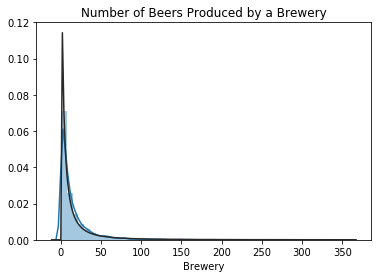

count    5640.000000
mean       15.912411
std        22.671524
min         1.000000
25%         3.000000
50%         8.000000
75%        19.000000
max       355.000000
Name: Brewery, dtype: float64

In [85]:
num = df['Brewery'].value_counts()
sns.distplot(num,fit=st.johnsonsu)
plt.title('Number of Beers Produced by a Brewery');    
plt.show()
num.describe()

The best fitting distribution I found was the [Johnson-$S_{U}$](https://en.wikipedia.org/wiki/Johnson%27s_SU-distribution) distribution which is a transformation of the normal distribution.

We will now run a regression to see if there is any relationship between the number of beers that a brewery produces and the average rating for that brewery.

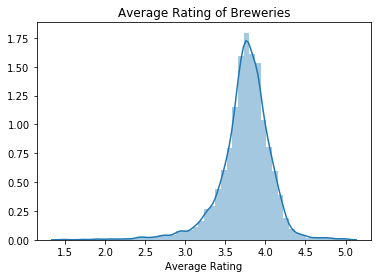

count    5640.000000
mean        3.747269
std         0.323310
min         1.470000
25%         3.614667
50%         3.773333
75%         3.930000
max         5.000000
Name: Average Rating, dtype: float64

In [86]:
brew = df.groupby(['Brewery'])
x = brew['BeerID'].count()
y = brew['Average Rating'].mean()
sns.distplot(y)
plt.title('Average Rating of Breweries')
plt.show()
y.describe()

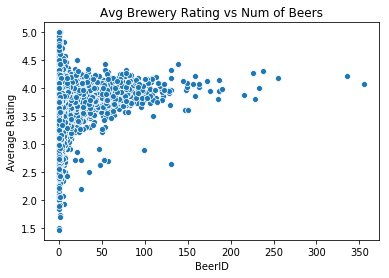

In [87]:
sns.scatterplot(x,y)
plt.title('Avg Brewery Rating vs Num of Beers')
plt.show()

In [88]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Average Rating   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     173.3
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           5.40e-39
Time:                        21:33:04   Log-Likelihood:                -1548.6
No. Observations:                5640   AIC:                             3101.
Df Residuals:                    5638   BIC:                             3114.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7081      0.005    715.677      0.000       3.698       3.718
BeerID         0.0025      0.000     13.162      0.000       0.002       0.003
==============================================================================
Omnibus:                     1381.739   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7436.465
Skew:                          -1.067   Prob(JB):                         0.00
Kurtosis:                       8.205   Cond. No.                         33.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There seems to be no correlation between the number of beers produced and the average rating of the brewery.

# Beer Style

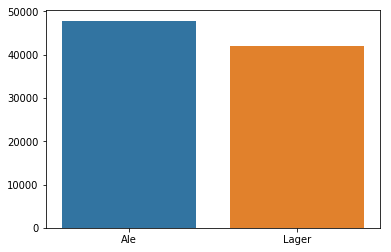

In [89]:
styles = df['Style'].value_counts()
ale_mask = styles.index.str.contains('Ale|IPA')
x = ['Ale','Lager']
y = [styles[ale_mask].sum(), styles[~ale_mask].sum()]
sns.barplot(x,y)
plt.show()

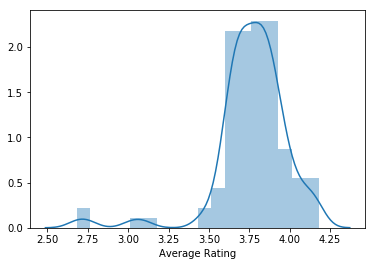

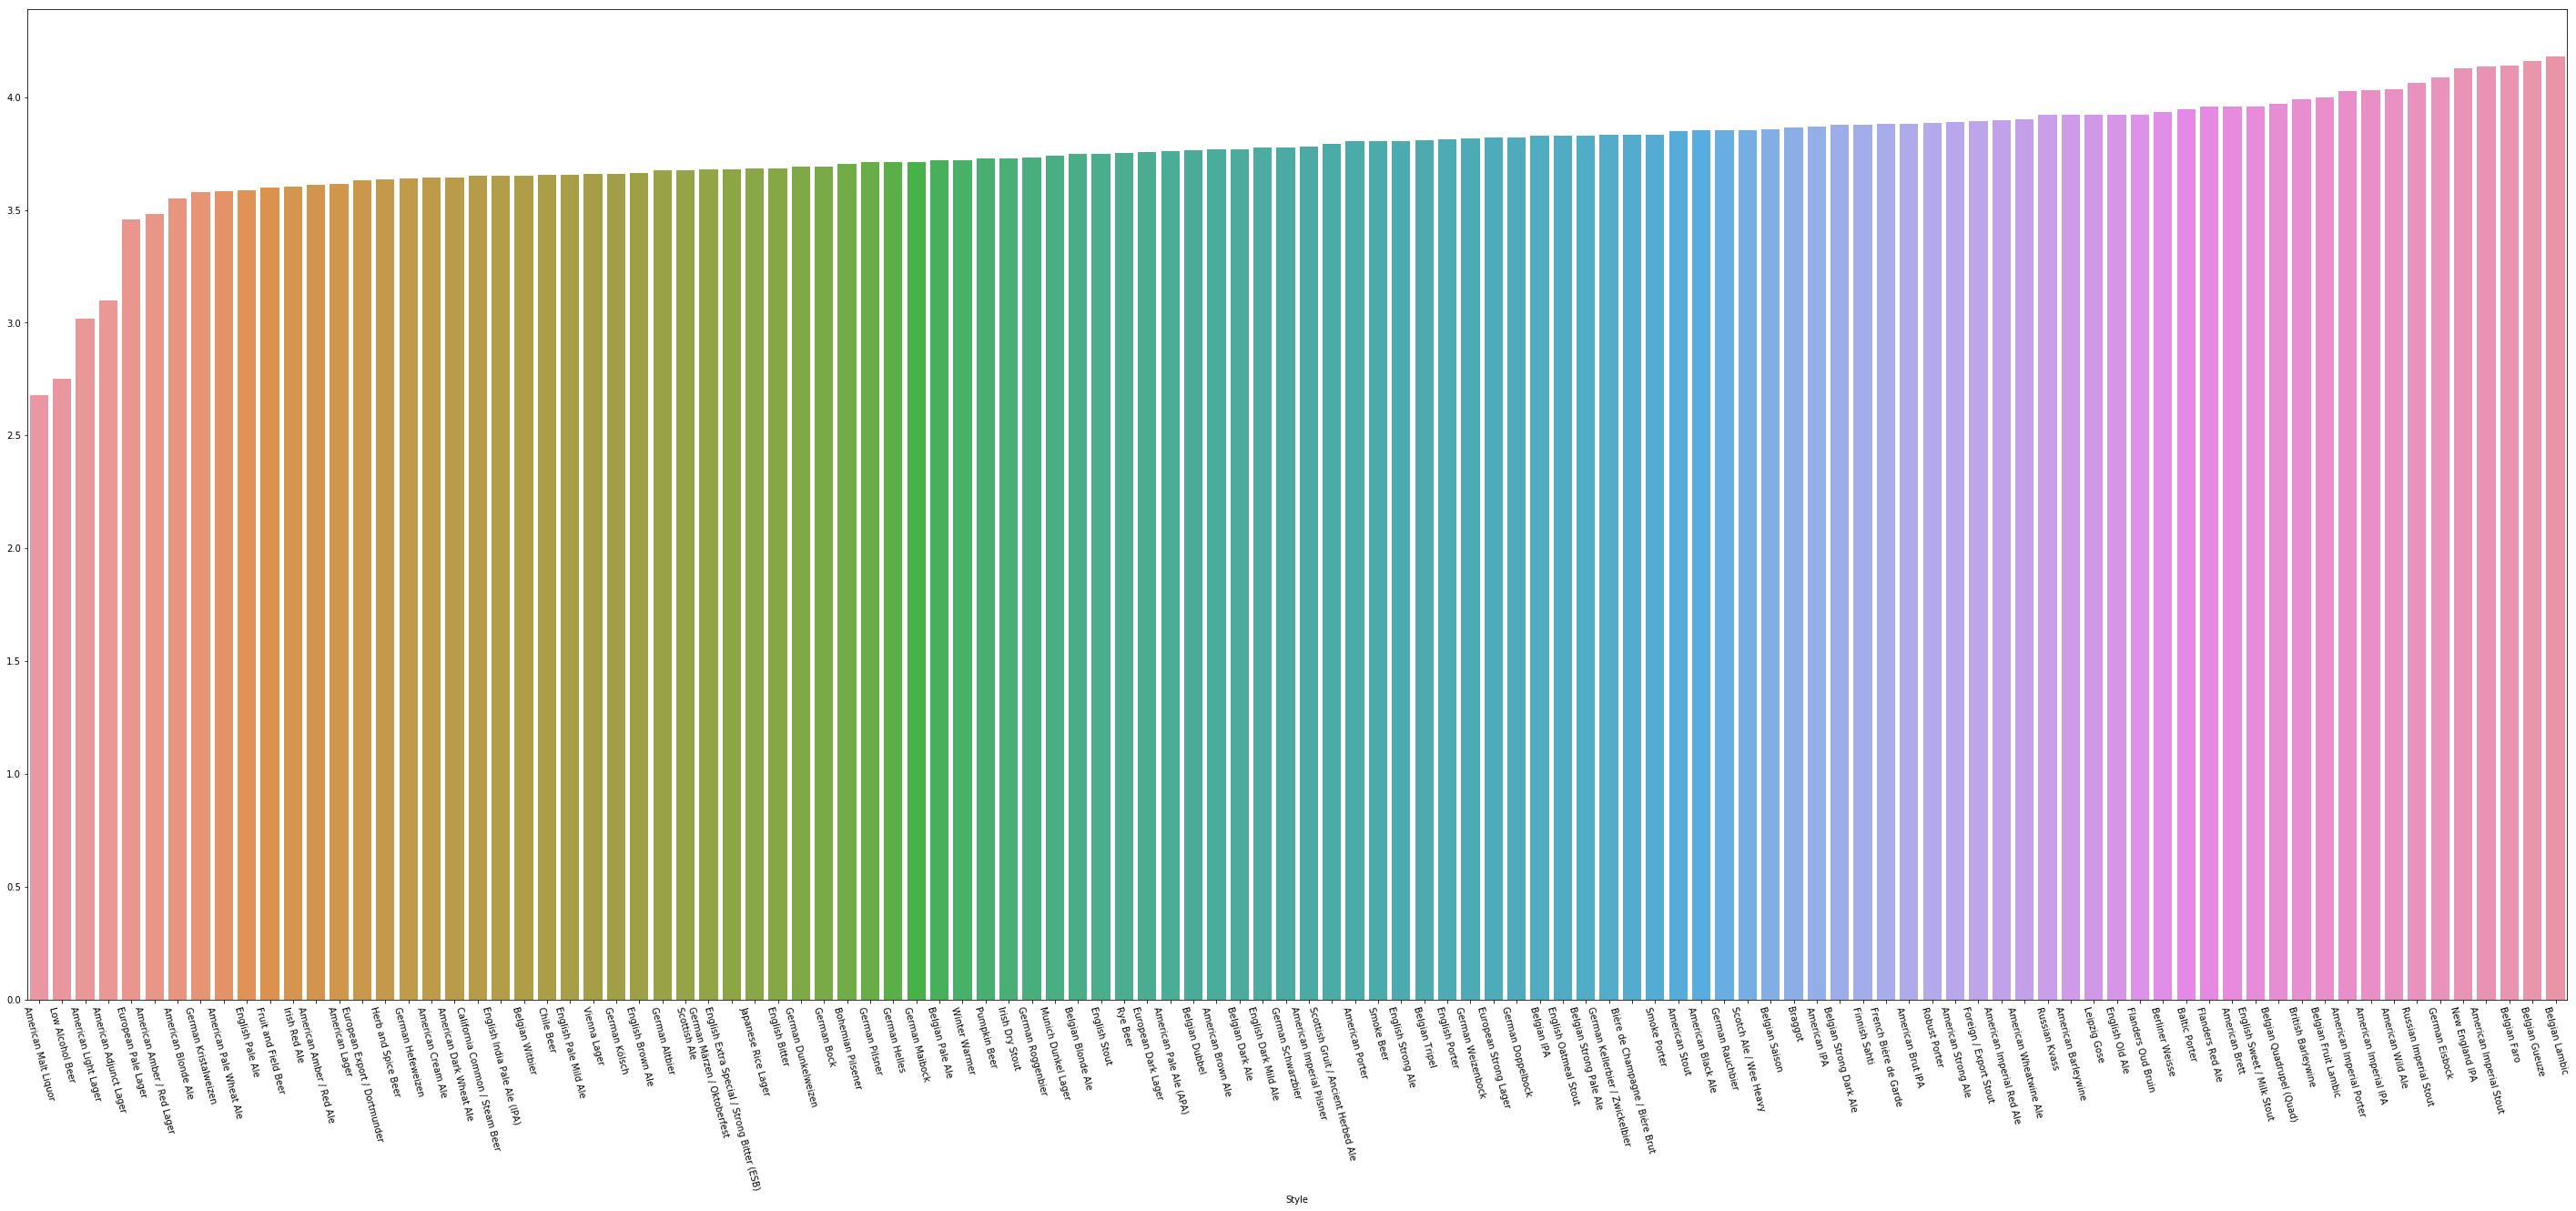

In [90]:
style = df.groupby('Style')
rating = style['Average Rating'].mean()
rating = rating.sort_values()
sns.distplot(rating)
plt.show()
plt.subplots(figsize=(50,20))
sns.barplot(x=rating.index, y=rating.values)
plt.xticks(rotation=-75)
plt.show()

Next we will look at the beers more granularly in the [groups](https://www.beeradvocate.com/beer/styles/) as defined by Beer Advocate.

In [91]:
bocks = ['German Bock', 'German Doppelbock', 'German Eisbock', 'German Maibock', 'German Weizenbock']
brown_ales = ['American Brown Ale', 'English Brown Ale', 'English Dark Mild Ale', 'German Altbier']
dark_ales = ['American Black Ale', 'Belgian Dark Ale', 'Belgian Dubbel', 'German Roggenbier', 'Scottish Ale', 'Winter Warmer']
dark_lagers = ['American Amber / Red Lager', 'European Dark Lager','German Märzen / Oktoberfest','German Rauchbier','German Schwarzbier','Munich Dunkel Lager','Vienna Lager']
hybrids = ['American Cream Ale','Bière de Champagne / Bière Brut','Braggot','California Common / Steam Beer']
ipas = ['American Brut IPA','American Imperial IPA','American IPA','Belgian IPA','English India Pale Ale (IPA)','New England IPA']
pale = ['American Amber / Red Ale','American Blonde Ale','American Pale Ale (APA)','Belgian Blonde Ale','Belgian Pale Ale','Belgian Saison','English Bitter','English Extra Special / Strong Bitter (ESB)','English Pale Ale','English Pale Mild Ale','French Bière de Garde','German Kölsch','Irish Red Ale']
pils = ['American Adjunct Lager','American Imperial Pilsner','American Lager','American Light Lager','American Malt Liquor','Bohemian Pilsener','European Export / Dortmunder','European Pale Lager','European Strong Lager','German Helles','German Kellerbier / Zwickelbier','German Pilsner']
porters = ['American Imperial Porter','American Porter','Baltic Porter','English Porter','Robust Porter','Smoke Porter']
special = ['Chile Beer','Finnish Sahti','Fruit and Field Beer','Herb and Spice Beer','Japanese Rice Lager','Low Alcohol Beer','Pumpkin Beer','Russian Kvass','Rye Beer','Scottish Gruit / Ancient Herbed Ale','Smoke Beer']
stout = ['American Imperial Stout','American Stout','English Oatmeal Stout','English Stout','English Sweet / Milk Stout','Foreign / Export Stout','Irish Dry Stout','Russian Imperial Stout']
strong = ['American Barleywine','American Imperial Red Ale','American Strong Ale','American Wheatwine Ale','Belgian Quadrupel (Quad)','Belgian Strong Dark Ale','Belgian Strong Pale Ale','Belgian Tripel','British Barleywine','English Old Ale','English Strong Ale','Scotch Ale / Wee Heavy']
wheat = ['American Dark Wheat Ale','American Pale Wheat Ale','Belgian Witbier','Berliner Weisse','German Dunkelweizen','German Hefeweizen','German Kristalweizen']
sour = ['American Brett','American Wild Ale','Belgian Faro','Belgian Fruit Lambic','Belgian Gueuze','Belgian Lambic','Flanders Oud Bruin','Flanders Red Ale','Leipzig Gose']

In [92]:
groups = [bocks,brown_ales,dark_ales,dark_lagers,hybrids,ipas,pale,pils,porters,special,stout,strong,wheat,sour]
group_label = ['bocks','brown_ales','dark_ales','dark_lagers','hybrids','ipas','pale','pils','porters','special','stout','strong','wheat','sour']

In [93]:
df_style = df.set_index('Style')
for i in range(len(groups)):
    df_style.loc[groups[i],'Category'] = group_label[i]

In [94]:
styles = df_style.groupby('Category')
abv = styles['ABV'].mean()
rating = styles['Average Rating'].mean()

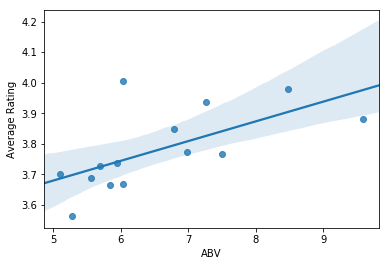

In [95]:
sns.regplot(abv,rating)
plt.show()

In [96]:
abv = sm.add_constant(abv)
model = sm.OLS(rating, abv).fit()
model.summary()

/home/infvie/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Average Rating   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     8.075
Date:                Mon, 28 Jan 2019   Prob (F-statistic):             0.0148
Time:                        21:33:06   Log-Likelihood:                 12.732
No. Observations:                  14   AIC:                            -21.46
Df Residuals:                      12   BIC:                            -20.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3565      0.152     22.056      0.000       3.025       3.688
ABV            0.0646      0.023      2.842      0.015       0.015       0.114
==============================================================================
Omnibus:                        7.261   Durbin-Watson:                   2.431
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                3.777
Skew:                           1.145   Prob(JB):                        0.151
Kurtosis:                       4.111   Cond. No.                         37.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It seems like there is a clear trend between the ABV of a beer and perception by consumers. We are going to correct and remove sours which seems to be a surprising taste braker! Despite its relatively low ABV it is consitantly ranked highly.

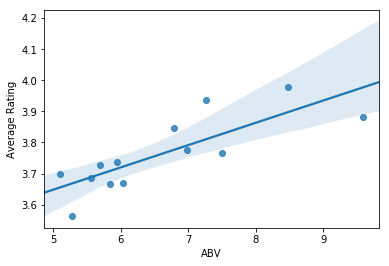

In [97]:
abv = abv.drop('sour')
rating = rating.drop('sour')
abv = abv['ABV']
sns.regplot(abv,rating)
plt.show()

In [98]:
abv = sm.add_constant(abv)
model = sm.OLS(rating, abv).fit()
model.summary()

/home/infvie/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Average Rating   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     20.07
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           0.000932
Time:                        21:33:07   Log-Likelihood:                 16.559
No. Observations:                  13   AIC:                            -29.12
Df Residuals:                      11   BIC:                            -27.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2894      0.108     30.473      0.000       3.052       3.527
ABV            0.0717      0.016      4.480      0.001       0.036       0.107
==============================================================================
Omnibus:                        0.523   Durbin-Watson:                   3.041
Prob(Omnibus):                  0.770   Jarque-Bera (JB):                0.548
Skew:                           0.141   Prob(JB):                        0.760
Kurtosis:                       2.034   Cond. No.                         36.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The cool thing is we can use the residuals to model how much a beer might deviate from this ABV vs Average Rating to see what other beers are taste breakers. This will give us clues on what we should investigate further.

In [109]:
model.resid.sort_values(ascending=False)

Category
ipas           0.125946
stout          0.081907
porters        0.071681
wheat          0.044861
pale           0.027928
brown_ales     0.021398
dark_lagers   -0.001359
dark_ales     -0.016135
hybrids       -0.042223
special       -0.052513
bocks         -0.061712
strong        -0.094809
pils          -0.104969
dtype: float64

Seemingly, pilsners are typically less well percieved than they should be while IPA's along with sours are percieved to be much better than is expected.

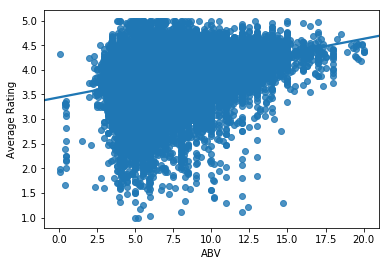

In [14]:
sns.regplot(df['ABV'],df['Average Rating'])
plt.show()

In [13]:
df = df.dropna()
df = df[df['ABV']<=20]
abv = sm.add_constant(df['ABV'])
model = sm.OLS(df['Average Rating'], abv).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Average Rating   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                 1.016e+04
Date:                Tue, 29 Jan 2019   Prob (F-statistic):               0.00
Time:                        09:30:17   Log-Likelihood:                -27923.
No. Observations:               82559   AIC:                         5.585e+04
Df Residuals:                   82557   BIC:                         5.587e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4402      0.004    828.417      0.000       3.432       3.448
ABV            0.0595      0.001    100.809      0.000       0.058       0.061
==============================================================================
Omnibus:                    18695.557   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78880.161
Skew:                          -1.063   Prob(JB):                         0.00
Kurtosis:                       7.291   Cond. No.                         25.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""